# Quantium Virtual Internship - Retail Strategy and Analytics<a class="anchor" id="table"></a>

In this task, we firstly focus on exploring two datasets - transaction and customer data, so that making sure there is no strange records. Then, we will develop the process of data analysis on customer segments with four different matrics. Then, we will dive into the group that we recommend to target and check their preference. At the end, we will draw some conclusion on the findings.

## Table of content
* [1. Load required libraries and datasets](#1)
* [2. Data exploration on transaction data](#2)
* [2.1. Check data type](#2.1)
* [2.2. Text analysis on product name](#2.2)
* [2.3. Check null and outlier value](#2.3)
* [2.4. Examine transaction by date](#2.4)
* [2.5. Examine transaction by pack size](#2.5)
* [2.6. Examine transaction by product name](#2.6)
* [3. Data exploration on customer data](#3)
* [4. Merge two dataset](#4)
* [5. Data analysis on customer segments](#5)
* [5.1. Matrics definition](#5.1)
* [5.2. Matrics 1: total sales](#5.2)
* [5.3. Matrics 2: number of customers](#5.3)
* [5.4. Matrics 3: units of chips per customer](#5.4)
* [5.5. Matrics 4: average price per unit of chips](#5.5)
* [5.6. Target customer segments](#5.6)
* [6. Conclusion](#6)

## 1. Load required libraries and datasets<a class="anchor" id="1"></a>
[Back to top](#table)

In [1]:
library(data.table)
library(ggplot2)
library(ggmosaic)
library(readr)
library(stringr)


Attaching package: ‘data.table’


The following object is masked _by_ ‘.GlobalEnv’:

    .N




In [2]:
filePath <- getwd()
transactionData <- fread(paste0(filePath,"/QVI_transaction_data.csv"))
customerData <- fread(paste0(filePath,"/QVI_purchase_behaviour.csv"))

## 2. Data exploration on transaction<a class="anchor" id="2"></a>
### 2.1. Check data type<a class="anchor" id="2.1"></a>
[Back to top](#table)

In [3]:
#### Examining transaction data and check data type
head(transactionData)

DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1


In [4]:
#### change DATE column to a date format
#### Excel integer dates begin on 30 Dec 1899
transactionData$DATE <- as.Date(transactionData$DATE, origin = "1899-12-30")

### 2.2. Text analysis on product name<a class="anchor" id="2.2"></a>
[Back to top](#table)

In [5]:
#### Examine PROD_NAME
transactionData[, .N, PROD_NAME]

PROD_NAME,N
<chr>,<int>
Natural Chip Compny SeaSalt175g,1468
CCs Nacho Cheese 175g,1498
Smiths Crinkle Cut Chips Chicken 170g,1484
Smiths Chip Thinly S/Cream&Onion 175g,1473
Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
Old El Paso Salsa Dip Tomato Mild 300g,3085
Smiths Crinkle Chips Salt & Vinegar 330g,3197
Grain Waves Sweet Chilli 210g,3167
Doritos Corn Chip Mexican Jalapeno 150g,3204


In [6]:
#### Step1: Seperate the words
productWords <- data.table(unlist(strsplit(unique(transactionData[, PROD_NAME]), " ")))
setnames(productWords, 'words')
head(productWords)

words
<chr>
Natural
Chip
""
""
""
""


In [7]:
#### Step2: Remove digits, special charaters
productWords <- productWords[grepl("\\d", words)==FALSE,]
productWords <- productWords[grepl("[:alpha:]", words),]
#### check the most common words by sorting the number of times they appear
productWords[, .N, words][order(-N)]

words,N
<chr>,<int>
Chips,21
Smiths,16
Crinkle,14
Kettle,13
Cheese,12
Salt,12
Original,10
Chip,9
Salsa,9


There are some *Salsa* products in the dataset, but we are only interested in the chips

In [8]:
#### Remove salsa products
transactionData[, SALSA:=grepl('salsa', tolower(PROD_NAME))]
transactionData <- transactionData[SALSA == FALSE,][,SALSA := NULL]

### 2.3. Check null and outlier value<a class="anchor" id="2.3"></a>
[Back to top](#table)

In [9]:
#### Summarise the data to check for nulls and possible outliers
summary(transactionData)

      DATE              STORE_NBR     LYLTY_CARD_NBR        TXN_ID       
 Min.   :2018-07-01   Min.   :  1.0   Min.   :   1000   Min.   :      1  
 1st Qu.:2018-09-30   1st Qu.: 70.0   1st Qu.:  70015   1st Qu.:  67569  
 Median :2018-12-30   Median :130.0   Median : 130367   Median : 135183  
 Mean   :2018-12-30   Mean   :135.1   Mean   : 135531   Mean   : 135131  
 3rd Qu.:2019-03-31   3rd Qu.:203.0   3rd Qu.: 203084   3rd Qu.: 202654  
 Max.   :2019-06-30   Max.   :272.0   Max.   :2373711   Max.   :2415841  
    PROD_NBR       PROD_NAME            PROD_QTY         TOT_SALES      
 Min.   :  1.00   Length:246742      Min.   :  1.000   Min.   :  1.700  
 1st Qu.: 26.00   Class :character   1st Qu.:  2.000   1st Qu.:  5.800  
 Median : 53.00   Mode  :character   Median :  2.000   Median :  7.400  
 Mean   : 56.35                      Mean   :  1.908   Mean   :  7.321  
 3rd Qu.: 87.00                      3rd Qu.:  2.000   3rd Qu.:  8.800  
 Max.   :114.00                      Max.   

There are no nulls in the columns - NA's will appear in the output if there are any nulls.  
PROD_QTY seems having outliers - The maximum is so far away from the 3rd quantile.

In [10]:
#### Examine the "outlier"
transactionData[PROD_QTY == 200, ]

DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
<date>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650
2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650


There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions where by the same customer. Let's see if the customer has had other transactions.

In [11]:
transactionData[LYLTY_CARD_NBR == 226000, ]

DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
<date>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650
2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We’ll remove this loyalty card number from further analysis.

In [12]:
#### Filter out the customer based on the loyalty card number
transactionData <- transactionData[LYLTY_CARD_NBR != 226000, ]

### 2.4. Examine transaction by date<a class="anchor" id="2.4"></a>
[Back to top](#table)

In [13]:
#### Count the number of transactions by date
transactionData[, .N, by = DATE]

DATE,N
<date>,<int>
2018-10-17,682
2019-05-14,705
2019-05-20,707
2018-08-17,663
2018-08-18,683
2019-05-16,664
2018-08-20,644
2019-05-17,652
2019-05-18,626


There’s only 364 rows, meaning only 364 dates which indicates a missing date. Let’s create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and find the missing date.

Warning message:
“Removed 30 row(s) containing missing values (geom_path).”


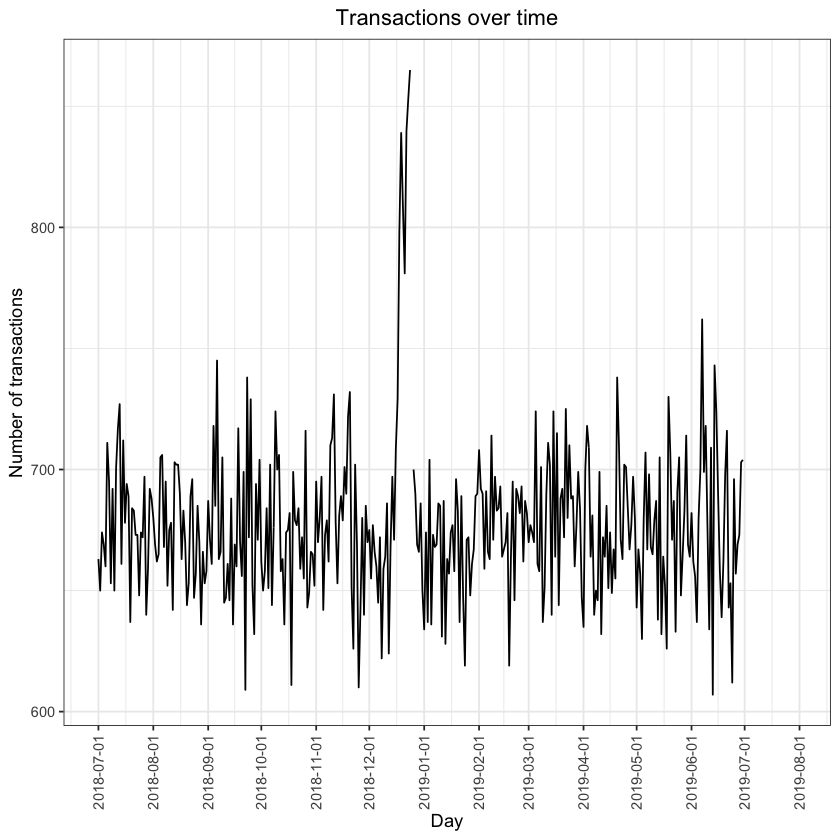

In [14]:
#### Create a sequence of dates
DateSeq <- data.table(seq(from=as.Date('2018-07-01'),
                          to=as.Date('2019-07-30'), by="1 day"))
setnames(DateSeq, 'DATE')
setkey(DateSeq, 'DATE')

#### Count of transactions by date
TransCount <- transactionData[, .N, by=DATE]
setkey(TransCount, 'DATE')

#### Left join Date sequenct and count of transactions by date
transactions_by_day <- TransCount[DateSeq, nomatch = NA]

#### Setting plot themes to format graphs
theme_set(theme_bw())
theme_update(plot.title = element_text(hjust = 0.5))

#### Plot transactions over time
ggplot(transactions_by_day, aes(x = DATE, y = N)) +
    geom_line() +
    labs(x = "Day", y = "Number of transactions", title = "Transactions over time") +
    scale_x_date(breaks = "1 month") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this.

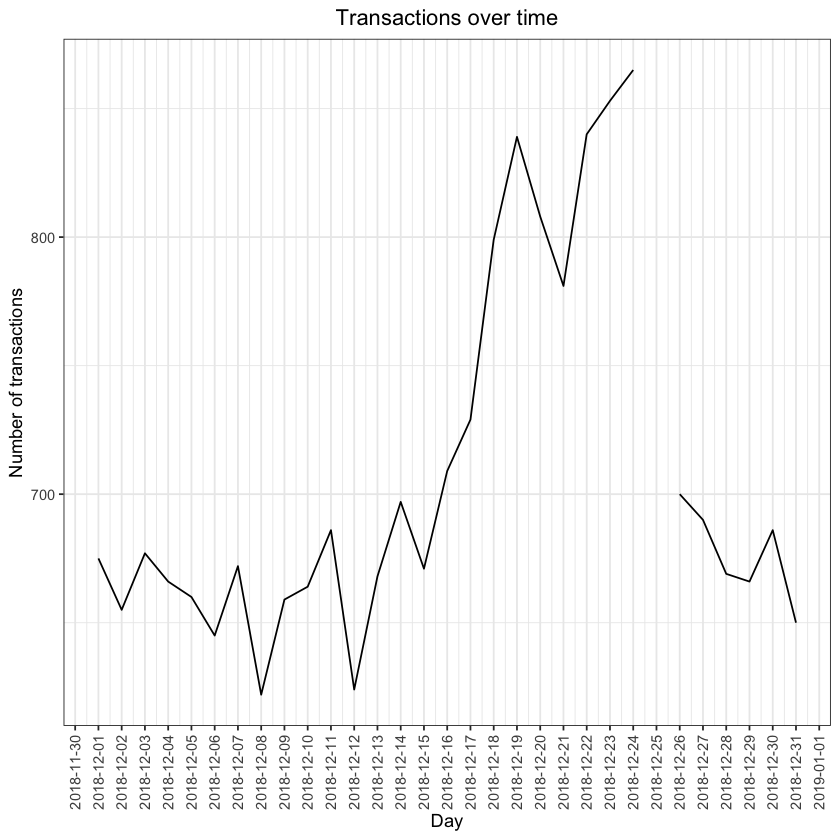

In [15]:
#transactions_by_day[DATE %between% c("2018-12-01", "2018-12-31")]
ggplot(transactions_by_day[month(DATE)==12,], aes(x = DATE, y = N)) +
    geom_line() +
    labs(x = "Day", y = "Number of transactions", title = "Transactions over time") +
    scale_x_date(breaks = "1 day") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

### 2.5. Examine transaction by pack size<a class="anchor" id="2.5"></a>
[Back to top](#table)

In [16]:
#### Extract pack size from the column PROD_NAME
transactionData[, PACK_SIZE := parse_number(PROD_NAME)]
#### Let's check if the pack sizes look sensible
transactions_by_size <- transactionData[, .N, PACK_SIZE][order(PACK_SIZE)]
transactions_by_size

PACK_SIZE,N
<dbl>,<int>
70,1507
90,3008
110,22387
125,1454
134,25102
135,3257
150,40203
160,2970
165,15297


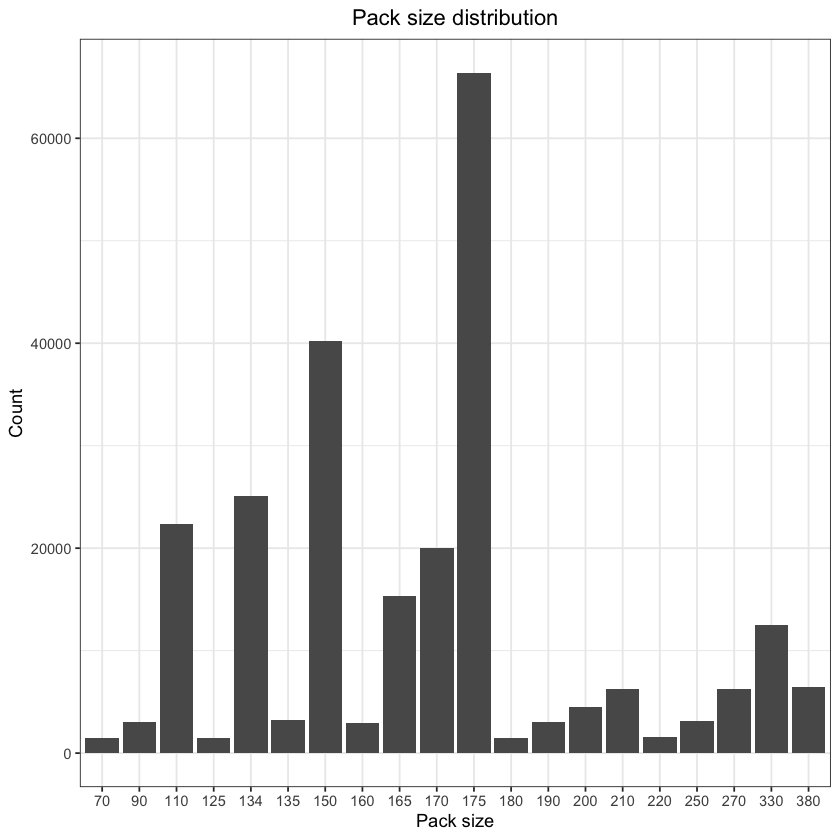

In [17]:
#### visualize the histgram
ggplot(transactions_by_size, aes(x=as.factor(PACK_SIZE), y=N))+
  geom_col() +
  labs(x='Pack size', y='Count', title='Pack size distribution') 

The largest size is 380g and the smallest size is 70g.  
The pack size sold most tend to be some small middle size.

### 2.6. Examine transaction by brand<a class="anchor" id="2.6"></a>
[Back to top](#table)

In [18]:
#### Extract brand from the column PROD_NAME
transactionData[, BRAND := gsub('([a-zA-Z]+).*','\\1',PROD_NAME)]
#### Checking brands
transactionData[, .N, BRAND][order(-N)]

BRAND,N
<chr>,<int>
Kettle,41288
Smiths,27390
Pringles,25102
Doritos,22041
Thins,14075
RRD,11894
Infuzions,11057
WW,10320
Cobs,9693


Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red Rock Deli chips. Let's combine these together.

In [19]:
#### Clean brand names
transactionData[BRAND == "Red", BRAND := "RRD"]
transactionData[BRAND =="Grnwves", BRAND := "Grain"]
transactionData[BRAND == "Dorito", BRAND := "Doritos"]
transactionData[BRAND == "Infzns", BRAND := "Infuzions"]
transactionData[BRAND == "Ncc", BRAND := "Natural"]
transactionData[BRAND == "Smith", BRAND := "Smiths"]
transactionData[BRAND == "Snbts", BRAND := "Sunbites"]
transactionData[BRAND == "Ww", BRAND := "Woolworths"]
transactionData[BRAND == "WW", BRAND := "Woolworths"]
#### Checking again
transactionData[, .N, BRAND][order(-N)]

BRAND,N
<chr>,<int>
Kettle,41288
Smiths,30353
Doritos,25224
Pringles,25102
RRD,16321
Infuzions,14201
Thins,14075
Woolworths,11836
Cobs,9693


## 3. Data exploration on customer<a class="anchor" id="3"></a>
[Back to top](#table)

In [20]:
#### Check null or outlier values
summary(customerData)

 LYLTY_CARD_NBR     LIFESTAGE         PREMIUM_CUSTOMER  
 Min.   :   1000   Length:72637       Length:72637      
 1st Qu.:  66202   Class :character   Class :character  
 Median : 134040   Mode  :character   Mode  :character  
 Mean   : 136186                                        
 3rd Qu.: 203375                                        
 Max.   :2373711                                        

In [21]:
#### Examining the values of lifestage and premium_customer
customerData[, .N, by = LIFESTAGE][order(-N)]
customerData[, .N, by = PREMIUM_CUSTOMER][order(-N)]

LIFESTAGE,N
<chr>,<int>
RETIREES,14805
OLDER SINGLES/COUPLES,14609
YOUNG SINGLES/COUPLES,14441
OLDER FAMILIES,9780
YOUNG FAMILIES,9178
MIDAGE SINGLES/COUPLES,7275
NEW FAMILIES,2549


PREMIUM_CUSTOMER,N
<chr>,<int>
Mainstream,29245
Budget,24470
Premium,18922


## 4. Merge two datasets<a class="anchor" id="4"></a>
[Back to top](#table)

In [22]:
#### Merge dataset
data <- merge(transactionData, customerData, all.x = TRUE) #`all.x = TRUE`: left join
head(data)

LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
<int>,<date>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,Grain,YOUNG FAMILIES,Budget
1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,Natural,YOUNG FAMILIES,Budget
1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,Woolworths,OLDER SINGLES/COUPLES,Mainstream
1005,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8,165,Cheetos,MIDAGE SINGLES/COUPLES,Mainstream


In [23]:
#### Check if there is duplicated row generated when joining
nrow(data) == nrow(transactionData)

[1] TRUE

In [24]:
#### Check if there is any null value after joining
data[is.null(LIFESTAGE), .N]
data[is.null(PREMIUM_CUSTOMER), .N]

[1] 0

[1] 0

In [25]:
#### Save the dataset
fwrite(data, paste0(filePath,"/QVI_data.csv"))

## 5. Data analysis on customer segments<a class="anchor" id="5"></a>
### 5.1. Matrics definition<a class="anchor" id="5.1"></a>
[Back to top](#table)

We can define some metrics of interest to the client:
  - Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
  - How many customers are in each segment
  - How many chips are bought per customer by segment
  - What's the average chip price by customer segment

We could also ask our data team for more information. Examples are:
  - The customer's total spend over the period and total spend for each transaction - to understand what proportion of their grocery spend is on chips
  - Proportion of customers in each customer segment overall - to compare against the mix of customers who purchase chips

### 5.2. Matrics 1: total sales<a class="anchor" id="5.2"></a>
[Back to top](#table)

In [26]:
#### Calculate sales grouping by LIFESTAGE and PREMIUM_CUSTOMER
GROUP_SALES <- data[,.(TOT_SALES=sum(TOT_SALES)), by=.(LIFESTAGE, PREMIUM_CUSTOMER)]
head(GROUP_SALES)

LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
<chr>,<chr>,<dbl>
YOUNG SINGLES/COUPLES,Premium,39052.30
YOUNG SINGLES/COUPLES,Mainstream,147582.20
YOUNG FAMILIES,Budget,129717.95
OLDER SINGLES/COUPLES,Mainstream,124648.50
MIDAGE SINGLES/COUPLES,Mainstream,84734.25
YOUNG SINGLES/COUPLES,Budget,57122.10


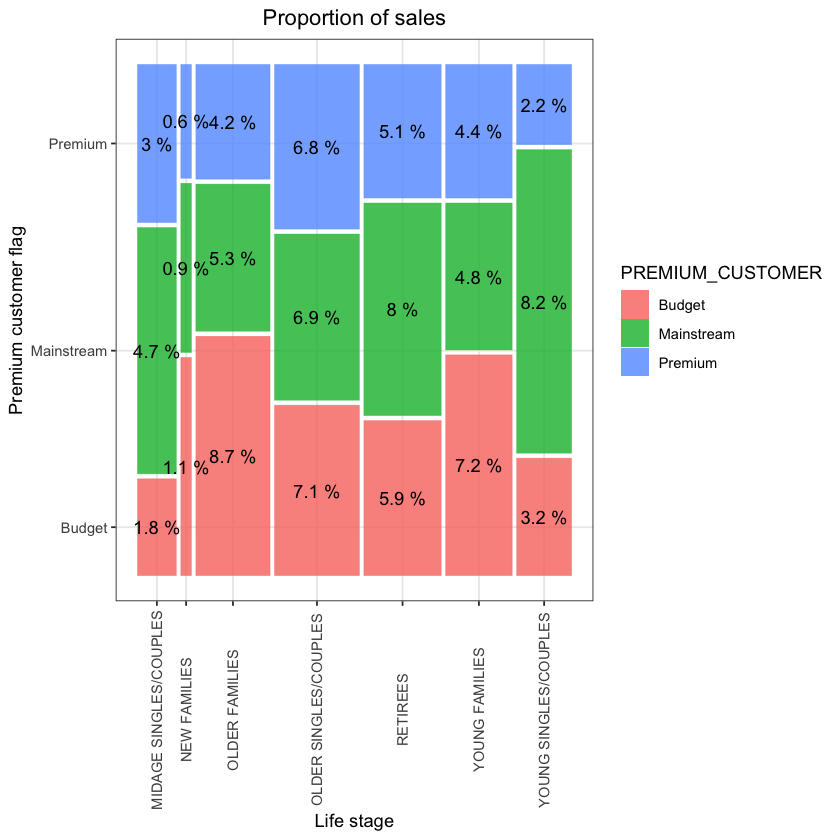

In [27]:
#### Mosaic plot
p <- ggplot(data=GROUP_SALES) +
    geom_mosaic(aes(weight=TOT_SALES, 
                    x=product(PREMIUM_CUSTOMER, LIFESTAGE),
                    fill=PREMIUM_CUSTOMER)) +
    labs(x="Life stage", y="Premium customer flag", title="Proportion of sales") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) 
#### Plot and label with proportion of sales
p + geom_text(data=ggplot_build(p)$data[[1]], 
              aes(x=(xmin+xmax)/2, y=(ymin+ymax)/2, 
                  label = as.character(paste(round(.wt/sum(.wt),3)*100, "%"))))

Sales are coming mainly from 
- Older families - Budget, 
- Young singles/couples - Mainstream, 
- Retirees - Mainstream

Let's see if the higher sales are due to there being more customers who buy chips.

### 5.3. Matrics 2: number of customers<a class='anchor' id='5.3'></a>
[Back to top](#table)

In [28]:
customers <- data[, .(CUSTOMERS = uniqueN(LYLTY_CARD_NBR)), .(LIFESTAGE, PREMIUM_CUSTOMER)][order(-CUSTOMERS)]
customers

LIFESTAGE,PREMIUM_CUSTOMER,CUSTOMERS
<chr>,<chr>,<int>
YOUNG SINGLES/COUPLES,Mainstream,7917
RETIREES,Mainstream,6358
OLDER SINGLES/COUPLES,Mainstream,4858
OLDER SINGLES/COUPLES,Budget,4849
OLDER SINGLES/COUPLES,Premium,4682
OLDER FAMILIES,Budget,4611
RETIREES,Budget,4385
YOUNG FAMILIES,Budget,3953
RETIREES,Premium,3812


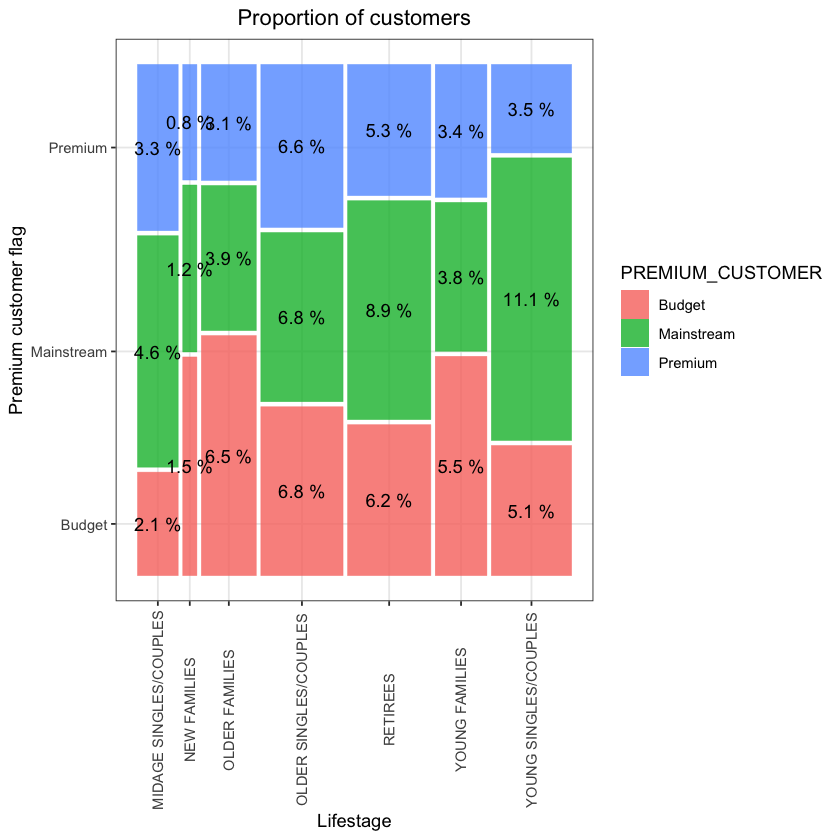

In [29]:
#### Mosaic plot
p <- ggplot(data=customers) +
    geom_mosaic(aes(weight=CUSTOMERS, 
                    x=product(PREMIUM_CUSTOMER, LIFESTAGE),
                    fill=PREMIUM_CUSTOMER)) +
    labs(x="Lifestage", y="Premium customer flag", title="Proportion of customers") +
    theme(axis.text.x=element_text(angle=90, vjust=0.5))
#### Plot and label with proportion of number of customers
p + geom_text(data=ggplot_build(p)$data[[1]], 
              aes(x=(xmin+xmax)/2, y=(ymin+ymax)/2,
                  label=as.character(paste(round(.wt/sum(.wt), 3)*100, "%"))))

These groups have the most customers, which contributes to there being more sales to these customer segments
- young Singles/couples - Mainstream 
- Retirees - Mainstream  

But, number of customers is not a major driver for the Older families - Budget segment.

### 5.4. Matrics 3: units of chips per customer<a class='anchor' id='5.4'></a>
[Back to top](#table)

In [30]:
GROUP_UNITS <- data[, .(AVE_UNIT=sum(PROD_QTY)/uniqueN(LYLTY_CARD_NBR)), 
                    by=.(LIFESTAGE, PREMIUM_CUSTOMER)][order(AVE_UNIT)]
GROUP_UNITS

LIFESTAGE,PREMIUM_CUSTOMER,AVE_UNIT
<chr>,<chr>,<dbl>
YOUNG SINGLES/COUPLES,Budget,4.250069
YOUNG SINGLES/COUPLES,Premium,4.264113
YOUNG SINGLES/COUPLES,Mainstream,4.575597
NEW FAMILIES,Premium,4.815652
NEW FAMILIES,Budget,4.821527
NEW FAMILIES,Mainstream,4.891566
RETIREES,Mainstream,5.925920
MIDAGE SINGLES/COUPLES,Budget,6.026459
MIDAGE SINGLES/COUPLES,Premium,6.078514


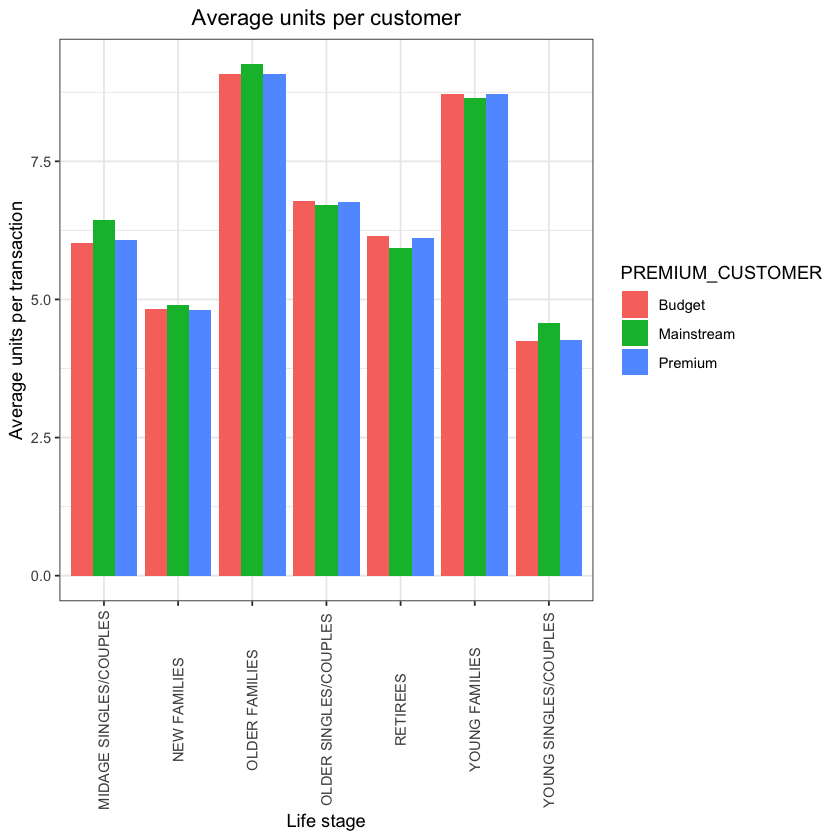

In [31]:
#### Create plot
ggplot(GROUP_UNITS, aes(weight=AVE_UNIT, 
                        x=LIFESTAGE, 
                        fill=PREMIUM_CUSTOMER)) +
    geom_bar(position=position_dodge()) +
    labs(x="Life stage", y="Average units per transaction", 
         title="Average units per customer") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

Older families and young families in general buy more chips per customer

### 5.5. Matrics 4: average price per unit of chips<a class='anchor' id='5.5'></a>
[Back to top](#table)

In [32]:
GROUP_PRICEUNIT <- data[, .(AVG_PRICE_PER_UNIT = sum(TOT_SALES)/sum(PROD_QTY)), 
                        by=.(LIFESTAGE, PREMIUM_CUSTOMER)][order(AVG_PRICE_PER_UNIT)]
GROUP_PRICEUNIT

LIFESTAGE,PREMIUM_CUSTOMER,AVG_PRICE_PER_UNIT
<chr>,<chr>,<dbl>
YOUNG SINGLES/COUPLES,Budget,3.685297
YOUNG SINGLES/COUPLES,Premium,3.692889
OLDER FAMILIES,Premium,3.717703
YOUNG FAMILIES,Mainstream,3.722439
OLDER FAMILIES,Mainstream,3.736380
OLDER FAMILIES,Budget,3.747969
MIDAGE SINGLES/COUPLES,Budget,3.753878
YOUNG FAMILIES,Premium,3.759232
YOUNG FAMILIES,Budget,3.761903


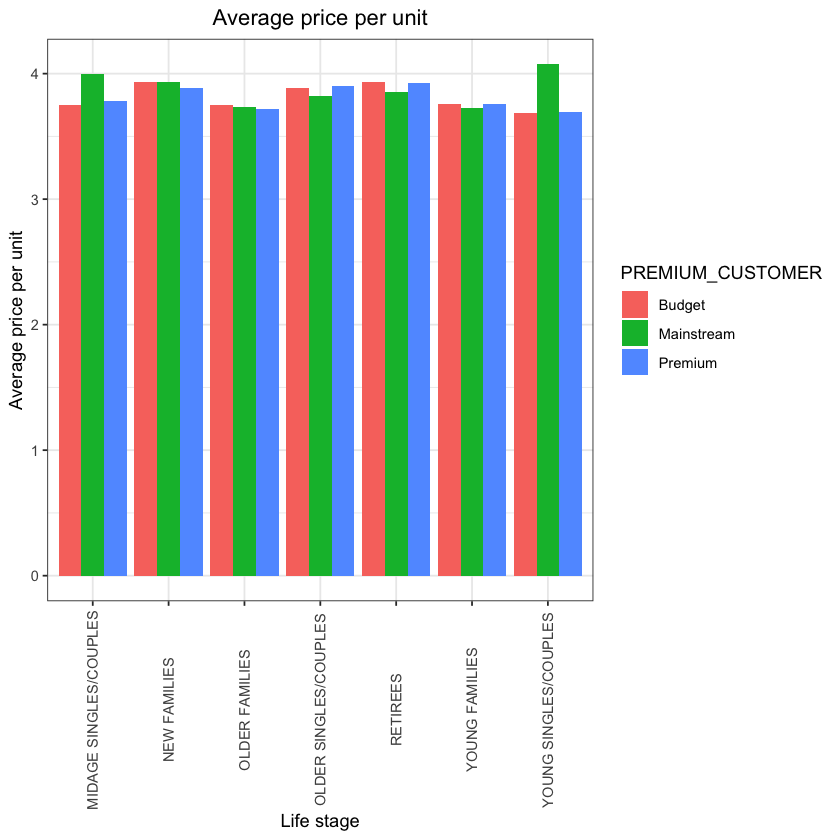

In [33]:
ggplot(GROUP_PRICEUNIT, aes(weight=AVG_PRICE_PER_UNIT, 
                            x=LIFESTAGE, 
                            fill=PREMIUM_CUSTOMER)) +
    geom_bar(position=position_dodge()) +
    labs(x="Life stage", y="Average price per unit", 
    title="Average price per unit") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

These groups are more willing to pay more per packet of chips compared to their budget and premium counterparts. 
- Mainstream mid-age singles and couples
- Mainstream young singles and couples 

This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. 

This is also supported by there being fewer premium mid-age and young singles and couples buying chips compared to their mainstream counterparts.

In [34]:
#### Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples
testData <- data[, PRICE_PER_UNIT := TOT_SALES/PROD_QTY]
testData <- testData[LIFESTAGE %in% c('YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES')]
t.test(testData[PREMIUM_CUSTOMER =='Mainstream', PRICE_PER_UNIT],
       testData[PREMIUM_CUSTOMER !='Mainstream', PRICE_PER_UNIT],
       alternative = "greater")


	Welch Two Sample t-test

data:  testData[PREMIUM_CUSTOMER == "Mainstream", PRICE_PER_UNIT] and testData[PREMIUM_CUSTOMER != "Mainstream", PRICE_PER_UNIT]
t = 37.624, df = 54791, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.3187234       Inf
sample estimates:
mean of x mean of y 
 4.039786  3.706491 


The t-test results in a p-value < 2.2e-16, i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.

### 5.6. Target customer segments <a class='anchor' id='5.6'></a>
[Back to top](#table)

Company should target *Young singles/couples - Mainstream* group because they
- contribute the most to sales, 
- have the most quantity of customers, 
- are willing to pay more per unit of chips

Let’s find out if they tend to buy a particular brand of chips.

In [35]:
#### Seperate two groups
segment1 <- data[LIFESTAGE == "YOUNG SINGLES/COUPLES" & PREMIUM_CUSTOMER == "Mainstream",]
other <- data[!(LIFESTAGE == "YOUNG SINGLES/COUPLES" & PREMIUM_CUSTOMER == "Mainstream"),]
#### Brand affinity compared to the rest of the population
quantity_segment1 <- segment1[, sum(PROD_QTY)]
quantity_other <- other[, sum(PROD_QTY)]

quantity_segment1_by_brand <- segment1[, .(targetSegment = sum(PROD_QTY)/quantity_segment1), by = BRAND]
quantity_other_by_brand <- other[, .(other = sum(PROD_QTY)/quantity_other), by = BRAND]

brand_proportions <- merge(quantity_segment1_by_brand,
                           quantity_other_by_brand)[, affinityToBrand := targetSegment/other]
brand_proportions[order(-affinityToBrand)]

BRAND,targetSegment,other,affinityToBrand
<chr>,<dbl>,<dbl>,<dbl>
Tyrrells,0.031552795,0.025692464,1.2280953
Twisties,0.046183575,0.037876520,1.2193194
Doritos,0.122760524,0.101074684,1.2145526
Kettle,0.197984817,0.165553442,1.1958967
Tostitos,0.045410628,0.037977861,1.1957131
Pringles,0.119420290,0.100634769,1.1866703
Grain,0.029123533,0.025121265,1.1593180
Cobs,0.044637681,0.039048861,1.1431238
Infuzions,0.064679089,0.057064679,1.1334347


We can see that :
- Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population
- Mainstream youngsingles/couples are 56% less likely to purchase Burger Rings compared to the rest of the population

Let’s also find out if our target segment tends to buy larger packs of chips.

In [36]:
#### Preferred pack size compared to the rest of the population
quantity_segment1_by_pack <- segment1[, .(targetSegment = sum(PROD_QTY)/quantity_segment1), by = PACK_SIZE]
quantity_other_by_pack <- other[, .(other = sum(PROD_QTY)/quantity_other), by = PACK_SIZE]
pack_proportions <- merge(quantity_segment1_by_pack, quantity_other_by_pack)[, affinityToPack := targetSegment/other]
pack_proportions[order(-affinityToPack)]

PACK_SIZE,targetSegment,other,affinityToPack
<dbl>,<dbl>,<dbl>,<dbl>
270,0.031828847,0.025095929,1.2682873
380,0.032160110,0.025584213,1.2570295
330,0.061283644,0.050161917,1.2217166
134,0.119420290,0.100634769,1.1866703
110,0.106280193,0.089791190,1.1836372
210,0.029123533,0.025121265,1.1593180
135,0.014768806,0.013075403,1.1295106
250,0.014354727,0.012780590,1.1231662
170,0.080772947,0.080985964,0.9973697


In [37]:
data[PACK_SIZE == 270, unique(PROD_NAME)]

[1] "Twisties Cheese     270g" "Twisties Chicken270g"

- It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population
- Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties.

### 6. Conclusion <a class='anchor' id='6'></a>
[Back to top](#table)

- Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. 
- We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour. 
- We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.